In [17]:
import pandas as pd
data = pd.read_csv('/Users/kalyani/Desktop/University/BMET2925/DATA2925/Data/Sleep_health_and_lifestyle_dataset.csv')


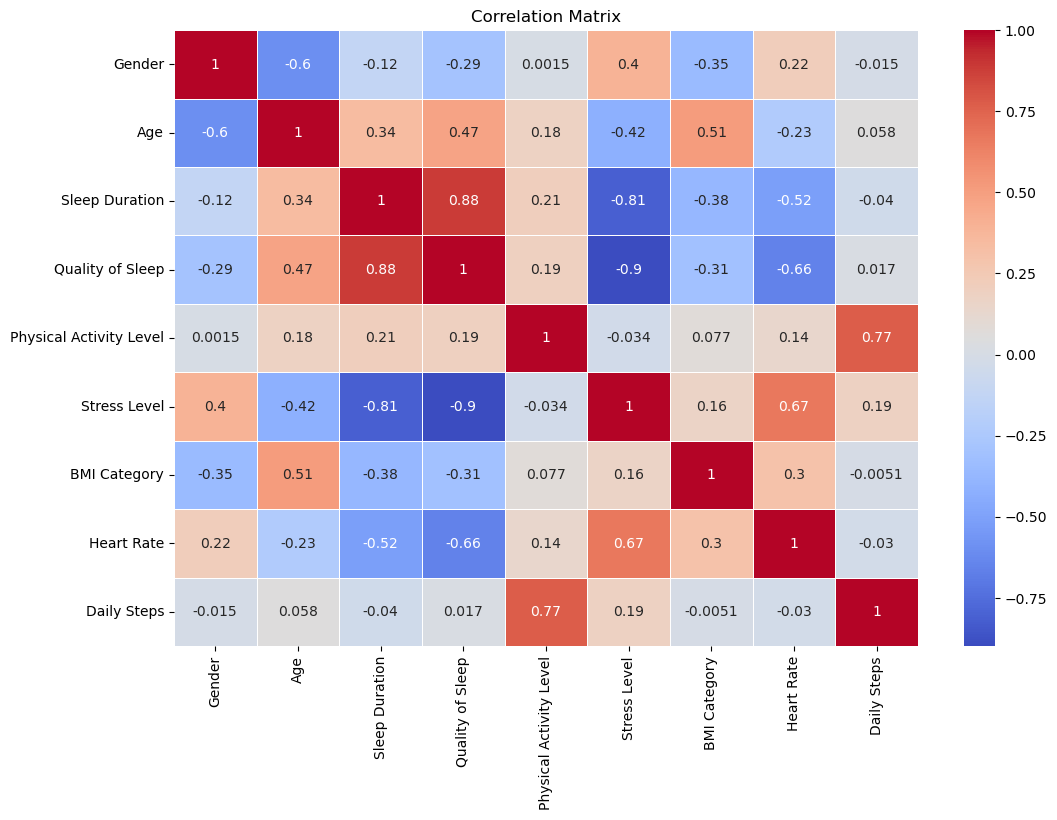

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your data
data = pd.read_csv('/Users/kalyani/Desktop/University/BMET2925/DATA2925/Data/Sleep_health_and_lifestyle_dataset.csv')

# Drop the 'Person ID' column from the DataFrame
data = data.drop('Person ID', axis=1)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'BMI Category' and 'Gender'
data['BMI Category'] = label_encoder.fit_transform(data['BMI Category'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Now you can proceed to plot the heatmap or perform any other analysis

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Normalize or scale the original features
scaler_sleep = StandardScaler()
scaled_sleep = scaler_sleep.fit_transform(data[['Quality of Sleep', 'Sleep Duration']])

scaler_activity = StandardScaler()
scaled_activity = scaler_activity.fit_transform(data[['Physical Activity Level', 'Daily Steps']])

# Combine the scaled features into composite columns
data['Sleep_Composite'] = scaled_sleep[:, 0] + scaled_sleep[:, 1]  # Example: Adding scaled values
data['Activity_Composite'] = scaled_activity[:, 0] + scaled_activity[:, 1]  # Example: Adding scaled values

# Drop the original columns if needed
data = data.drop(columns=['Quality of Sleep', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps'])

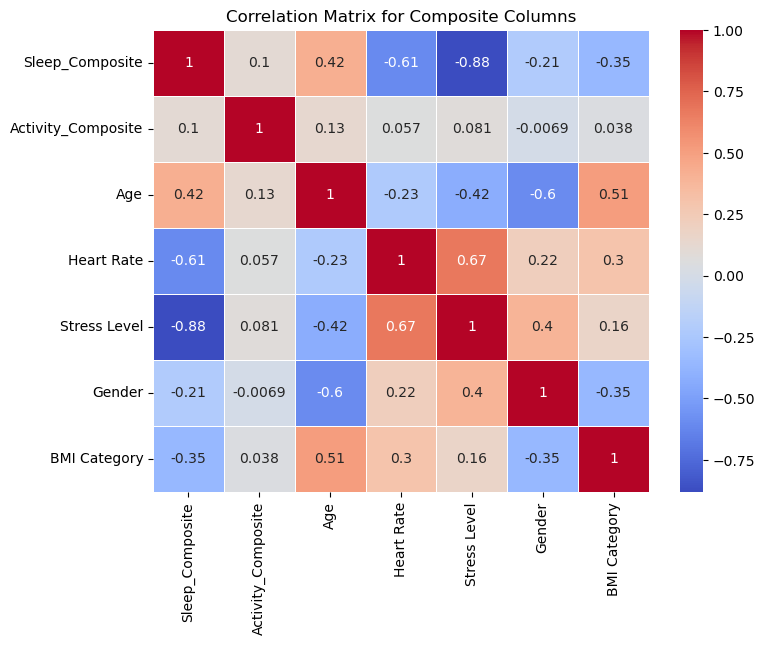

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = data[['Sleep_Composite', 'Activity_Composite', 'Age', 'Heart Rate', 'Stress Level', "Gender", "BMI Category"]].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Composite Columns')
plt.show()

In [26]:
columns_to_keep = ['Sleep_Composite', 'Activity_Composite', 'Age', 'Heart Rate', 'Stress Level', 'Gender', 'BMI Category']
data = data[[col for col in data.columns if col in columns_to_keep]]

data

,Gender,Age,Stress Level,BMI Category,Heart Rate,Sleep_Composite,Activity_Composite
0,1,27,6,3,77,-2.397167,-2.445002
1,1,28,8,0,75,-2.271316,2.009922
2,1,28,8,0,75,-2.271316,2.009922
3,1,28,8,2,85,-4.322012,-3.764532
4,1,28,8,2,85,-4.322012,-3.764532
...,...,...,...,...,...,...,...
369,0,59,3,3,68,2.629562,0.874252
370,0,59,3,3,68,2.503712,0.874252
371,0,59,3,3,68,2.629562,0.874252
372,0,59,3,3,68,2.629562,0.874252
